In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/doctor-specialist-recommendation-system/Original_Dataset.csv
/kaggle/input/doctor-specialist-recommendation-system/Doctor_Specialist.csv
/kaggle/input/doctor-specialist-recommendation-system/Symptom_Weights.csv
/kaggle/input/doctor-specialist-recommendation-system/Doctor_Versus_Disease.csv
/kaggle/input/doctor-specialist-recommendation-system/Specialist.xlsx
/kaggle/input/doctor-specialist-recommendation-system/Disease_Description.csv
/kaggle/input/surgical-specialists-in-pakistan/PakistanSurgerySpecialist.csv
/kaggle/input/surgical-specialists-in-pakistan/pk_medical_specialist_counts.csv


In [3]:
#Starting with disease prediction
disease_predict_df=pd.read_csv('/kaggle/input/doctor-specialist-recommendation-system/Original_Dataset.csv')
disease_predict_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
disease_predict_df.shape

(4920, 18)

In [5]:
disease_predict_df.fillna(0,inplace=True)

In [6]:
disease_predict_df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,0,0,0,0,0,0,0,0,0,0,0


In [7]:
column_values =disease_predict_df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']].values.ravel()
#ravel flattens 2D array into 1D array
print(column_values)

['itching' ' skin_rash' ' nodal_skin_eruptions' ... 0 0 0]


In [8]:
column_values.shape #stores all values of symptoms...

(83640,)

In [9]:
symps = pd.unique(column_values).tolist()
symp = [i for i in symps if str(i) != "0"]#not counting 0 as unique...

print("The unique types of symptoms:",len(symp))

The unique types of symptoms: 131


In [10]:
# Initialize the new DataFrame
disease_symptom_df = pd.DataFrame(columns=['Disease'] + symp)
disease_symptom_df.head()
#Coloumn names done!

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze


In [11]:
disease_symptom_df['Disease']=disease_predict_df['Disease']
disease_symptom_df.shape

(4920, 132)

In [12]:
disease_symptom_df.head()

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Initialize the new column "symptoms" with empty lists
disease_predict_df["symptoms"] = [[] for _ in range(len(disease_predict_df))]

# Iterate over each row
for i in range(len(disease_predict_df)):
    # Extract the row values as a list
    row_values = disease_predict_df.iloc[i].values.tolist()
    
    # Check if 0 is in the list of row values
    if 0 in row_values:
        # Get the sublist of symptoms from the second element to the first occurrence of 0
        symptoms_list = row_values[1:row_values.index(0)]
    else:
        # Get the sublist of symptoms from the second element to the end
        symptoms_list = row_values[1:]
    
    # Assign the symptoms list to the "symptoms" column for the current row
    disease_predict_df.at[i, "symptoms"] = symptoms_list

In [14]:
disease_predict_df["symptoms"] 

0       [itching,  skin_rash,  nodal_skin_eruptions,  ...
1       [ skin_rash,  nodal_skin_eruptions,  dischromi...
2       [itching,  nodal_skin_eruptions,  dischromic _...
3             [itching,  skin_rash,  dischromic _patches]
4            [itching,  skin_rash,  nodal_skin_eruptions]
                              ...                        
4915    [ vomiting,  headache,  nausea,  spinning_move...
4916    [ skin_rash,  pus_filled_pimples,  blackheads,...
4917    [ burning_micturition,  bladder_discomfort,  f...
4918    [ skin_rash,  joint_pain,  skin_peeling,  silv...
4919    [ skin_rash,  high_fever,  blister,  red_sore_...
Name: symptoms, Length: 4920, dtype: object

In [15]:
symptoms_series = pd.Series(disease_predict_df["symptoms"] )
symptoms_series

0       [itching,  skin_rash,  nodal_skin_eruptions,  ...
1       [ skin_rash,  nodal_skin_eruptions,  dischromi...
2       [itching,  nodal_skin_eruptions,  dischromic _...
3             [itching,  skin_rash,  dischromic _patches]
4            [itching,  skin_rash,  nodal_skin_eruptions]
                              ...                        
4915    [ vomiting,  headache,  nausea,  spinning_move...
4916    [ skin_rash,  pus_filled_pimples,  blackheads,...
4917    [ burning_micturition,  bladder_discomfort,  f...
4918    [ skin_rash,  joint_pain,  skin_peeling,  silv...
4919    [ skin_rash,  high_fever,  blister,  red_sore_...
Name: symptoms, Length: 4920, dtype: object

In [16]:
disease_symptom_df.iloc[:, 1:] = 0

# Iterate over each row in disease_symptom_df
for i in range(len(disease_symptom_df)):
    symptoms = symptoms_series.iloc[i]  # Get the list of symptoms for the current row
    
    # Update the columns based on the presence of symptoms
    for symptom in symptoms:
        if symptom in symp:
            disease_symptom_df.at[i, symptom] = 1





In [17]:
disease_symptom_df.head()

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
disease_symptom_df.shape

(4920, 132)

---

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Example DataFrame (Replace with your actual data)
X = disease_symptom_df.drop(columns=['Disease'])
y = disease_symptom_df['Disease']  # Example target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 1.0000
Random Forest Accuracy: 1.0000
Support Vector Machine Accuracy: 1.0000
K-Nearest Neighbors Accuracy: 1.0000
Naive Bayes Accuracy: 1.0000


---

Now we are successfully able to predict disease from symptoms

In [20]:
#error -UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 490: invalid start byte
# Previously wasnt able to read 
encodings = ['ISO-8859-1', 'windows-1252', 'utf-16']
for enc in encodings:
    try:
        doc_vs_disease = pd.read_csv('/kaggle/input/doctor-specialist-recommendation-system/Doctor_Versus_Disease.csv', header=None, index_col=None, encoding=enc)
        print(f"File read successfully with encoding: {enc}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read file with encoding: {enc}")


File read successfully with encoding: ISO-8859-1


In [21]:
doc_vs_disease

,0,1
0,Drug Reaction,Allergist
1,Allergy,Allergist
2,Hypertension,Cardiologist
3,Heart attack,Cardiologist
4,Psoriasis,Dermatologist
5,Chicken pox,Dermatologist
6,Acne,Dermatologist
7,Impetigo,Dermatologist
8,Fungal infection,Dermatologist
9,Hypothyroidism,Endocrinologist


In [22]:
#Convert  to dictionary
dictionary = doc_vs_disease.set_index(0).to_dict()[1]

# Display the dictionary
print(dictionary)

{'Drug Reaction': 'Allergist', 'Allergy': 'Allergist', 'Hypertension ': 'Cardiologist', 'Heart attack': 'Cardiologist', 'Psoriasis': 'Dermatologist', 'Chicken pox': 'Dermatologist', 'Acne': 'Dermatologist', 'Impetigo': 'Dermatologist', 'Fungal infection': 'Dermatologist', 'Hypothyroidism': 'Endocrinologist', 'Diabetes ': 'Endocrinologist', 'Hypoglycemia': 'Endocrinologist', 'Hyperthyroidism': 'Endocrinologist', 'GERD': 'Gastroenterologist', 'Peptic ulcer diseae': 'Gastroenterologist', 'Jaundice': 'Gastroenterologist', 'Dimorphic hemmorhoids(piles)': 'Gastroenterologist\xa0', 'Gastroenteritis': 'Gastroenterologist', 'Urinary tract infection': 'Gynecologist', 'Chronic cholestasis': 'Hepatologist', 'hepatitis A': 'Hepatologist', 'Hepatitis B': 'hepatologist', 'Hepatitis C': 'Hepatologist', 'Hepatitis E': 'Hepatologist', 'Hepatitis D': 'Hepatologist', 'Alcoholic hepatitis': 'Hepatologist', 'Malaria': 'Internal Medcine', 'Dengue': 'Internal Medcine', 'Migraine': 'Neurologist', 'Cervical spo

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score




In [24]:
def predict_specialist(predicted_disease):
    return dictionary.get(predicted_disease, 'Unknown Specialist')

# Load and prepare your data (assuming `disease_symptom_df` is already defined)
X = disease_symptom_df.drop(columns=['Disease'])
y = disease_symptom_df['Disease']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Convert predictions to specialist recommendations
specialist_recommendations = [predict_specialist(disease) for disease in y_pred]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True).head(len(y_pred)).values,
    'Predicted': y_pred,
    'Specialist_Recommended': [predict_specialist(disease) for disease in y_pred]
})

print(comparison_df.head(5))  # Show the first 5 rows

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

                Actual            Predicted Specialist_Recommended
0                 Acne                 Acne          Dermatologist
1                 Acne                 Acne          Dermatologist
2      Hyperthyroidism      Hyperthyroidism        Endocrinologist
3                 AIDS                 AIDS            Osteopathic
4  Chronic cholestasis  Chronic cholestasis           Hepatologist
Accuracy: 1.00


**We are now able to Predict Disease and recommend a specialist accordingly.**

In [25]:
doctors=pd.read_csv('/kaggle/input/surgical-specialists-in-pakistan/PakistanSurgerySpecialist.csv')

In [26]:
doctors.head()

,Medical Intervention,SURGERY TYPE,Name,AVAILABLE DOCTORS,QUALIFICATIONS,RATINGS,SATISFACTION
0,Exosome Stem Cell Therapy,Aesthetic Physician,Dr. Anum Arshad,1,"MBBS, Certified ( Cosmeceuticals & Skin Peel),...",0,80%
1,Roux-en-Y Gastric Bypass (RYGB),Bariatric / Weight Loss Surgeon,Dr. Mushtaq Ahmad,1,"MBBS, FCPS (General Surgery)",2,67%
2,Angiography,Cardiologist,Dr. Gul Shan Ahmad,1,"MBBS, FCPS, Fellow Ship in interventional Card...",48,100%
3,Angioplasty,Cardiologist,Dr. Gul Shan Ahmad,1,"MBBS, FCPS, Fellow Ship in interventional Card...",48,100%
4,Hypospadias Surgery,Cosmetic Surgeon,Asst. Prof. Dr. Kamal Uddin Khan,2,"MBBS, FCPS (Plastic Surgery)",275,93%


In [27]:
specialist_count=pd.read_csv('/kaggle/input/surgical-specialists-in-pakistan/pk_medical_specialist_counts.csv')

In [28]:
specialist_count.head()

,Specialist,Available Doctors
0,Acupuncture,9
1,Aesthetic Physician,30
2,Allergy Specialist,6
3,Andrologist,11
4,Anesthetist,53


In [29]:
# Get the unique values in the 'SURGERY TYPE' column
unique_surgery_types = doctors['SURGERY TYPE'].unique()

# Print the unique surgery types
for surgery_type in unique_surgery_types:
    print(surgery_type)

Aesthetic Physician
Bariatric / Weight Loss Surgeon
Cardiologist
Cosmetic Surgeon
Dentist
Dermatologist
Ent Specialist
Ent Surgeon
Eye Specialist
Eye Surgeon
Gastroenterologist
General Surgeon
Gynecologist
Nephrologist
Neuro Surgeon
Oral and Maxillofacial Surgeon
Orthopedic Surgeon
Pediatric Surgeon
Plastic Surgeon
Restorative Dentist
Rheumatologist
Urologist
Vascular Surgeon


In [30]:
print(unique_surgery_types)

['Aesthetic Physician' 'Bariatric / Weight Loss Surgeon' 'Cardiologist'
 'Cosmetic Surgeon' 'Dentist' 'Dermatologist' 'Ent Specialist'
 'Ent Surgeon' 'Eye Specialist' 'Eye Surgeon' 'Gastroenterologist'
 'General Surgeon' 'Gynecologist' 'Nephrologist' 'Neuro Surgeon'
 'Oral and Maxillofacial Surgeon' 'Orthopedic Surgeon' 'Pediatric Surgeon'
 'Plastic Surgeon' 'Restorative Dentist' 'Rheumatologist' 'Urologist'
 'Vascular Surgeon']


In [31]:
print(dictionary.values())

dict_values(['Allergist', 'Allergist', 'Cardiologist', 'Cardiologist', 'Dermatologist', 'Dermatologist', 'Dermatologist', 'Dermatologist', 'Dermatologist', 'Endocrinologist', 'Endocrinologist', 'Endocrinologist', 'Endocrinologist', 'Gastroenterologist', 'Gastroenterologist', 'Gastroenterologist', 'Gastroenterologist\xa0', 'Gastroenterologist', 'Gynecologist', 'Hepatologist', 'Hepatologist', 'hepatologist', 'Hepatologist', 'Hepatologist', 'Hepatologist', 'Hepatologist', 'Internal Medcine', 'Internal Medcine', 'Neurologist', 'Neurologist', 'Neurologist', 'Osteopathic', 'Otolaryngologist', 'Otolaryngologist', 'Pediatrician', 'Phlebologist', 'Pulmonologist', 'Pulmonologist', 'Rheumatologists', 'Rheumatologists', 'Tuberculosis'])


Lets match the ones we have doctors available for.

In [32]:
# Normalize function to strip spaces and convert to lower case
def normalize(s):
    return s.strip().lower()

# Normalize the lists
normalized_surgery_set = set(normalize(s) for s in unique_surgery_types)
normalized_dict_set = set(normalize(s) for s in dictionary.values())

# Find the intersection of the normalized sets
matching_specialists = normalized_surgery_set.intersection(normalized_dict_set)

# Print the matching specialists
for specialist in matching_specialists:
    print(specialist.title())  # Convert back to title case for display


Cardiologist
Dermatologist
Gynecologist
Gastroenterologist


In [33]:
Unique_Disease=doctors['Medical Intervention'].unique()
print(Unique_Disease)


['Exosome Stem Cell Therapy' 'Roux-en-Y Gastric Bypass (RYGB)'
 'Angiography' 'Angioplasty' 'Hypospadias Surgery' 'Subcision Nanofat'
 'Buccal Fat Removal' 'Body Sculpting With Liposuction' 'Korean Botox'
 'Congenital Melanocytic Nevi (CMN)' 'American Botox' 'Crown Porcelain'
 'Anterior Teeth Veneers Zirconia' 'Wisdom Tooth Extraction Surgical'
 'Amalgam Filling' 'Gingivectomy' 'Simple Composite'
 'Composite Filling 2 Walls' 'Composite Filling 3 Walls'
 'Large Composite Filling 4 Walls' 'Esthetic Composite Buildups'
 'Porcelain Veneers' 'Premium Braces Orthodontics' 'Operculectomy'
 'Pulpotomy' 'GIC Filling' 'Laser Filling' 'Ultrasonic Scaling'
 'Zirconia Crown' 'Surgical Extraction' 'Aligners' 'Veneers Composite'
 'Veneers Emax' 'Root Canal Treatment' 'Simple Wisdom Tooth Extraction'
 'RCT Conventional' 'Fluoride Treatment' 'RCT Multiple Roots'
 'Extraction Simple' 'Zirconium/Emax Crowns' 'Zirconium/Emax Veneers'
 'Scaling/Root Debridement/Session' 'Orthognathic Surgeries'
 'Non-Surgi

In [34]:
print(dictionary.keys())

dict_keys(['Drug Reaction', 'Allergy', 'Hypertension ', 'Heart attack', 'Psoriasis', 'Chicken pox', 'Acne', 'Impetigo', 'Fungal infection', 'Hypothyroidism', 'Diabetes ', 'Hypoglycemia', 'Hyperthyroidism', 'GERD', 'Peptic ulcer diseae', 'Jaundice', 'Dimorphic hemmorhoids(piles)', 'Gastroenteritis', 'Urinary tract infection', 'Chronic cholestasis', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis E', 'Hepatitis D', 'Alcoholic hepatitis', 'Malaria', 'Dengue', 'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'AIDS', '(vertigo) Paroymsal  Positional Vertigo', 'Common Cold', 'Typhoid', 'Varicose veins', 'Bronchial Asthma', 'Pneumonia', 'Osteoarthristis', 'Arthritis', 'Tuberculosis'])


In [35]:
# Normalize function to strip spaces and convert to lower case
def normalize(s):
    return s.strip().lower()

# Normalize the lists
normalized_surgery_set = set(normalize(s) for s in Unique_Disease)
normalized_dict_set = set(normalize(s) for s in dictionary.keys())

# Find the intersection of the normalized sets
matching_specialists = normalized_surgery_set.intersection(normalized_dict_set)

# Print the matching specialists
for specialist in matching_specialists:
    print(specialist.title())  # Convert back to title case for display

Doesn't seem like any match....
we can work on:
* Dermatologist
* Gynecologist
* Gastroenterologist
* Cardiologist

In [36]:
doctors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Medical Intervention  563 non-null    object
 1   SURGERY TYPE          563 non-null    object
 2   Name                  563 non-null    object
 3   AVAILABLE DOCTORS     563 non-null    int64 
 4   QUALIFICATIONS        563 non-null    object
 5   RATINGS               563 non-null    object
 6   SATISFACTION          563 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.9+ KB


In [37]:
# List of specific values to filter by
specific_values = ['Dermatologist', 'Gynecologist', 'Gastroenterologist', 'Cardiologist']

# Filter the DataFrame
filtered_df = doctors[doctors['SURGERY TYPE'].isin(specific_values)]

# Display the filtered DataFrame
print(filtered_df)

                                  Medical Intervention   SURGERY TYPE  \
2                                          Angiography   Cardiologist   
3                                          Angioplasty   Cardiologist   
77   Hydrafacial For Deep Cleansing, Exfoliation, A...  Dermatologist   
78                                  Cheek Augmentation  Dermatologist   
79                                  Jawline Contouring  Dermatologist   
..                                                 ...            ...   
349                      Laparotomy For Ovarian Cancer   Gynecologist   
350                                  Manchester Repair   Gynecologist   
351                       Vaginal Surgery For Prolapse   Gynecologist   
352                                  Suction Curettage   Gynecologist   
353                         Excision Of Vulvar Lesions   Gynecologist   

                                   Name  AVAILABLE DOCTORS  \
2                    Dr. Gul Shan Ahmad                  1   

In [38]:
doctors=filtered_df

In [39]:
doctors.head(15)

,Medical Intervention,SURGERY TYPE,Name,AVAILABLE DOCTORS,QUALIFICATIONS,RATINGS,SATISFACTION
2,Angiography,Cardiologist,Dr. Gul Shan Ahmad,1,"MBBS, FCPS, Fellow Ship in interventional Card...",48,100%
3,Angioplasty,Cardiologist,Dr. Gul Shan Ahmad,1,"MBBS, FCPS, Fellow Ship in interventional Card...",48,100%
77,"Hydrafacial For Deep Cleansing, Exfoliation, A...",Dermatologist,Dr. Malik Aftab Afzal,3,"MD , Diploma (Dermatology), Master of Science ...",652,97%
78,Cheek Augmentation,Dermatologist,Dr. Fawad Hussain,3,"MBBS, Diplomate in Dermatology and Dermatosurg...",524,99%
79,Jawline Contouring,Dermatologist,Dr. Fawad Hussain,1,"MBBS, Diplomate in Dermatology and Dermatosurg...",524,99%
80,Non-surgical Nose Job,Dermatologist,Dr. Fawad Hussain,3,"MBBS, Diplomate in Dermatology and Dermatosurg...",524,99%
81,Hand Rejuvenation,Dermatologist,Dr. Aqsa Zubair Awan,2,"MBBS, FCPS (Dermatology)",200,98%
82,Platelet-rich Fibrin (PRF) Treatment,Dermatologist,Dr. Ghulam Mujtaba,2,"MBBS, FCPS (Dermatology)","2,338",95%
83,Chemical Eyebrow Lift,Dermatologist,Dr. Fawad Hussain,2,"MBBS, Diplomate in Dermatology and Dermatosurg...",524,99%
84,Chemical Nose Lift,Dermatologist,Dr. Fawad Hussain,1,"MBBS, Diplomate in Dermatology and Dermatosurg...",524,99%


We will use 3 methods of recomendations:
1. Weighted average (satisfaction + Rating count)
2. Collabration-Based (Rating count based)
3. Content Based (Qualification)

In [40]:
df1=doctors
df2=doctors
df3=doctors

**Weighted average (satisfaction + Rating count)**

---


In [ ]:
display=df1


In [41]:
# Convert SATISFACTION to numerical values
df1['SATISFACTION'] = df1['SATISFACTION'].astype(str).str.rstrip('%').astype('float') / 100

df1['SATISFACTION']

2      1.00
3      1.00
77     0.97
78     0.99
79     0.99
       ... 
349    1.00
350    0.96
351    1.00
352    0.96
353    0.98
Name: SATISFACTION, Length: 213, dtype: float64

In [42]:

df1 = doctors

# Convert RATINGS and SATISFACTION to numeric types
df1['RATINGS'] = pd.to_numeric(df1['RATINGS'], errors='coerce')
df1['SATISFACTION'] = df1['SATISFACTION'].astype(str).str.rstrip('%').astype('float') / 100

# Normalize RATINGS and SATISFACTION
df1['Normalized RATINGS'] = df1['RATINGS'] / df1['RATINGS'].max()
df1['Normalized SATISFACTION'] = df1['SATISFACTION'] / df1['SATISFACTION'].max()

# Apply weighted average formula (assigning equal weights for simplicity)
weight_ratings = 0.5
weight_satisfaction = 0.5
df1['Recommendation Score'] = (
    weight_ratings * df1['Normalized RATINGS'] + 
    weight_satisfaction * df1['Normalized SATISFACTION']
)

# Display the DataFrame with the Recommendation Score
print(df1[['Medical Intervention', 'SURGERY TYPE', 'Name', 'RATINGS', 'SATISFACTION', 'Recommendation Score']])


                                  Medical Intervention   SURGERY TYPE  \
2                                          Angiography   Cardiologist   
3                                          Angioplasty   Cardiologist   
77   Hydrafacial For Deep Cleansing, Exfoliation, A...  Dermatologist   
78                                  Cheek Augmentation  Dermatologist   
79                                  Jawline Contouring  Dermatologist   
..                                                 ...            ...   
349                      Laparotomy For Ovarian Cancer   Gynecologist   
350                                  Manchester Repair   Gynecologist   
351                       Vaginal Surgery For Prolapse   Gynecologist   
352                                  Suction Curettage   Gynecologist   
353                         Excision Of Vulvar Lesions   Gynecologist   

                                   Name  RATINGS  SATISFACTION  \
2                    Dr. Gul Shan Ahmad     48.0        0

In [44]:
display_sorted=df1.sort_values('Recommendation Score',ascending=False)
display_sorted[[ 'SURGERY TYPE', 'Name', 'RATINGS', 'Recommendation Score']].head(20)



,SURGERY TYPE,Name,RATINGS,Recommendation Score
124,Dermatologist,Dr. Malik Aftab Afzal,652.0,0.98500
77,Dermatologist,Dr. Malik Aftab Afzal,652.0,0.98500
111,Dermatologist,Dr. Malik Aftab Afzal,652.0,0.98500
149,Dermatologist,Dr. Fawad Hussain,524.0,0.89684
129,Dermatologist,Dr. Fawad Hussain,524.0,0.89684
128,Dermatologist,Dr. Fawad Hussain,524.0,0.89684
127,Dermatologist,Dr. Fawad Hussain,524.0,0.89684
126,Dermatologist,Dr. Fawad Hussain,524.0,0.89684
125,Dermatologist,Dr. Fawad Hussain,524.0,0.89684
122,Dermatologist,Dr. Fawad Hussain,524.0,0.89684


Text(0, 0.5, 'Doctor Name')

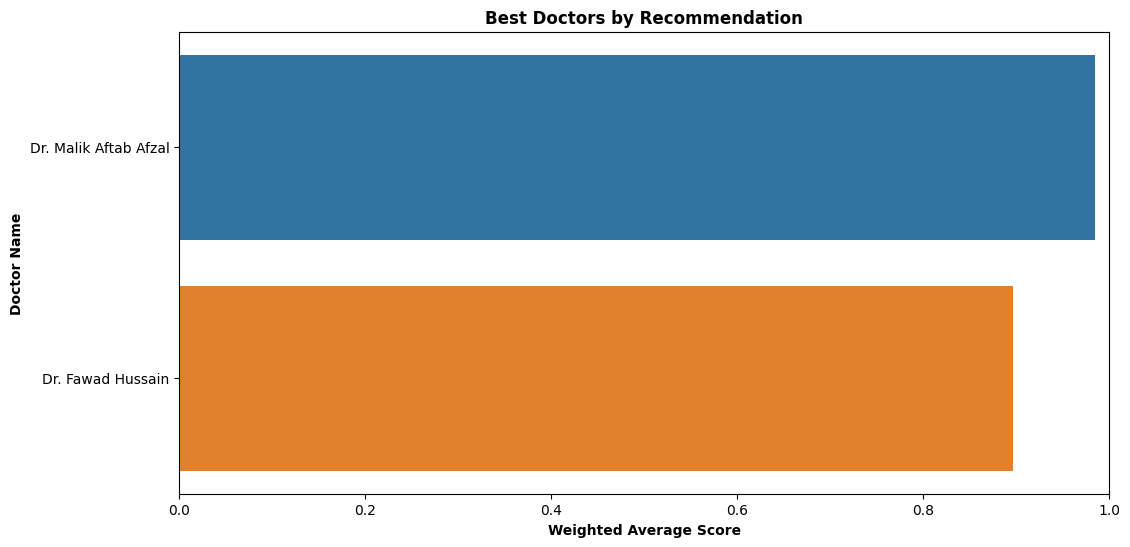

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

weight_average=display_sorted
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['Recommendation Score'].head(10), y=weight_average['Name'].head(20), data=weight_average)
plt.xlim(0,1)
plt.title('Best Doctors by Recommendation', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Doctor Name', weight='bold')


In [57]:
df1


,Medical Intervention,SURGERY TYPE,Name,AVAILABLE DOCTORS,QUALIFICATIONS,RATINGS,SATISFACTION,Normalized RATINGS,Normalized SATISFACTION,Recommendation Score
2,Angiography,Cardiologist,Dr. Gul Shan Ahmad,1,"MBBS, FCPS, Fellow Ship in interventional Card...",48.0,0.0100,0.073620,1.00,0.536810
3,Angioplasty,Cardiologist,Dr. Gul Shan Ahmad,1,"MBBS, FCPS, Fellow Ship in interventional Card...",48.0,0.0100,0.073620,1.00,0.536810
77,"Hydrafacial For Deep Cleansing, Exfoliation, A...",Dermatologist,Dr. Malik Aftab Afzal,3,"MD , Diploma (Dermatology), Master of Science ...",652.0,0.0097,1.000000,0.97,0.985000
78,Cheek Augmentation,Dermatologist,Dr. Fawad Hussain,3,"MBBS, Diplomate in Dermatology and Dermatosurg...",524.0,0.0099,0.803681,0.99,0.896840
79,Jawline Contouring,Dermatologist,Dr. Fawad Hussain,1,"MBBS, Diplomate in Dermatology and Dermatosurg...",524.0,0.0099,0.803681,0.99,0.896840
...,...,...,...,...,...,...,...,...,...,...
349,Laparotomy For Ovarian Cancer,Gynecologist,Dr. Shamim Fatima,1,"MBBS, MCPS (Obstetrics & Gynaecology)",88.0,0.0100,0.134969,1.00,0.567485
350,Manchester Repair,Gynecologist,Assoc. Prof. Dr. Khadija Asim Khan,2,"MBBS, FCPS ( Obstetrics & Gynecology)",186.0,0.0096,0.285276,0.96,0.622638
351,Vaginal Surgery For Prolapse,Gynecologist,Dr. Shamim Fatima,1,"MBBS, MCPS (Obstetrics & Gynaecology)",88.0,0.0100,0.134969,1.00,0.567485
352,Suction Curettage,Gynecologist,Assoc. Prof. Dr. Khadija Asim Khan,1,"MBBS, FCPS ( Obstetrics & Gynecology)",186.0,0.0096,0.285276,0.96,0.622638


However Qualifications may play an important role in ratings...

In [66]:
df1_advanced = df1.dropna(axis=0)

In [67]:
df1_advanced

,Medical Intervention,SURGERY TYPE,Name,AVAILABLE DOCTORS,QUALIFICATIONS,RATINGS,SATISFACTION,Normalized RATINGS,Normalized SATISFACTION,Recommendation Score
2,Angiography,Cardiologist,Dr. Gul Shan Ahmad,1,"MBBS, FCPS, Fellow Ship in interventional Card...",48.0,0.0100,0.073620,1.00,0.536810
3,Angioplasty,Cardiologist,Dr. Gul Shan Ahmad,1,"MBBS, FCPS, Fellow Ship in interventional Card...",48.0,0.0100,0.073620,1.00,0.536810
77,"Hydrafacial For Deep Cleansing, Exfoliation, A...",Dermatologist,Dr. Malik Aftab Afzal,3,"MD , Diploma (Dermatology), Master of Science ...",652.0,0.0097,1.000000,0.97,0.985000
78,Cheek Augmentation,Dermatologist,Dr. Fawad Hussain,3,"MBBS, Diplomate in Dermatology and Dermatosurg...",524.0,0.0099,0.803681,0.99,0.896840
79,Jawline Contouring,Dermatologist,Dr. Fawad Hussain,1,"MBBS, Diplomate in Dermatology and Dermatosurg...",524.0,0.0099,0.803681,0.99,0.896840
...,...,...,...,...,...,...,...,...,...,...
349,Laparotomy For Ovarian Cancer,Gynecologist,Dr. Shamim Fatima,1,"MBBS, MCPS (Obstetrics & Gynaecology)",88.0,0.0100,0.134969,1.00,0.567485
350,Manchester Repair,Gynecologist,Assoc. Prof. Dr. Khadija Asim Khan,2,"MBBS, FCPS ( Obstetrics & Gynecology)",186.0,0.0096,0.285276,0.96,0.622638
351,Vaginal Surgery For Prolapse,Gynecologist,Dr. Shamim Fatima,1,"MBBS, MCPS (Obstetrics & Gynaecology)",88.0,0.0100,0.134969,1.00,0.567485
352,Suction Curettage,Gynecologist,Assoc. Prof. Dr. Khadija Asim Khan,1,"MBBS, FCPS ( Obstetrics & Gynecology)",186.0,0.0096,0.285276,0.96,0.622638


In [68]:
# Assuming QUALIFICATIONS can be scored, for simplicity let's assign a score based on the presence of specific qualifications
qualification_scores = {
    'MBBS': 1,
    'FCPS': 2,
    'MD': 3,
    'Diploma': 1.5,
    'MRCOG': 2.5,
    'Fellowship': 3
}

# Example scoring function for qualifications (you may need to adjust based on actual qualification strings)
def score_qualifications(qualifications):
    score = 0
    for qual in qualification_scores:
        if qual in qualifications:
            score += qualification_scores[qual]
    return score

# Apply scoring to QUALIFICATIONS
df1_advanced['Qualification Score'] = df1_advanced['QUALIFICATIONS'].apply(score_qualifications)

# Normalize AVAILABLE DOCTORS and Qualification Score
df1_advanced['Normalized AVAILABLE DOCTORS'] = df1_advanced['AVAILABLE DOCTORS'] / df1_advanced['AVAILABLE DOCTORS'].max()
df1_advanced['Normalized Qualification Score'] = df1_advanced['Qualification Score'] / df1_advanced['Qualification Score'].max()

# Define new weights
weight_ratings = 0.3
weight_satisfaction = 0.3
weight_availability = 0.2
weight_qualifications = 0.2

# Calculate the new Recommendation Score
df1_advanced['Recommendation Score'] = (
    weight_ratings * df1_advanced['Normalized RATINGS'] +
    weight_satisfaction * df1_advanced['Normalized SATISFACTION'] +
    weight_availability * df1_advanced['Normalized AVAILABLE DOCTORS'] +
    weight_qualifications * df1_advanced['Normalized Qualification Score']
)

# Display the DataFrame with the new Recommendation Score
print(df1_advanced[['Medical Intervention', 'SURGERY TYPE', 'Name', 'RATINGS', 'SATISFACTION', 'Recommendation Score']])


                                  Medical Intervention   SURGERY TYPE  \
2                                          Angiography   Cardiologist   
3                                          Angioplasty   Cardiologist   
77   Hydrafacial For Deep Cleansing, Exfoliation, A...  Dermatologist   
78                                  Cheek Augmentation  Dermatologist   
79                                  Jawline Contouring  Dermatologist   
..                                                 ...            ...   
349                      Laparotomy For Ovarian Cancer   Gynecologist   
350                                  Manchester Repair   Gynecologist   
351                       Vaginal Surgery For Prolapse   Gynecologist   
352                                  Suction Curettage   Gynecologist   
353                         Excision Of Vulvar Lesions   Gynecologist   

                                   Name  RATINGS  SATISFACTION  \
2                    Dr. Gul Shan Ahmad     48.0        0

/tmp/ipykernel_33/1070696718.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_advanced['Qualification Score'] = df1_advanced['QUALIFICATIONS'].apply(score_qualifications)
/tmp/ipykernel_33/1070696718.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_advanced['Normalized AVAILABLE DOCTORS'] = df1_advanced['AVAILABLE DOCTORS'] / df1_advanced['AVAILABLE DOCTORS'].max()
/tmp/ipykernel_33/1070696718.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [69]:
df1_advanced.sort_values('Recommendation Score',ascending=False)

,Medical Intervention,SURGERY TYPE,Name,AVAILABLE DOCTORS,QUALIFICATIONS,RATINGS,SATISFACTION,Normalized RATINGS,Normalized SATISFACTION,Recommendation Score,Qualification Score,Normalized AVAILABLE DOCTORS,Normalized Qualification Score
111,Microneedling For Skin Rejuvenation And Acne S...,Dermatologist,Dr. Malik Aftab Afzal,5,"MD , Diploma (Dermatology), Master of Science ...",652.0,0.0097,1.000000,0.97,0.807993,4.5,0.555556,0.529412
104,Thread Lifts For Skin Lifting,Dermatologist,Dr. Fawad Hussain,9,"MBBS, Diplomate in Dermatology and Dermatosurg...",524.0,0.0099,0.803681,0.99,0.796928,2.5,1.000000,0.294118
98,Thread Lifts For Skin Lifting,Dermatologist,Dr. Fawad Hussain,9,"MBBS, Diplomate in Dermatology and Dermatosurg...",524.0,0.0099,0.803681,0.99,0.796928,2.5,1.000000,0.294118
292,Ovarian Cystectomy,Gynecologist,Dr. Nazifa Mubashir,4,"MBBS, FCPS, MRCOG, Fellowship (Gynecology Lapa...",457.0,0.0098,0.700920,0.98,0.793165,8.5,0.444444,1.000000
287,Ovarian Cystectomy,Gynecologist,Dr. Nazifa Mubashir,4,"MBBS, FCPS, MRCOG, Fellowship (Gynecology Lapa...",457.0,0.0098,0.700920,0.98,0.793165,8.5,0.444444,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Dermal Fillers,Dermatologist,Dr. Farhana Nazir,1,"MBBS, MCPS (Dermatology)",13.0,0.0100,0.019939,1.00,0.351733,1.0,0.111111,0.117647
123,Dermal Fillers,Dermatologist,Dr. Farhana Nazir,1,"MBBS, MCPS (Dermatology)",13.0,0.0100,0.019939,1.00,0.351733,1.0,0.111111,0.117647
114,Botox Injections For Wrinkles And Fine Lines,Dermatologist,Dr. Farhana Nazir,1,"MBBS, MCPS (Dermatology)",13.0,0.0100,0.019939,1.00,0.351733,1.0,0.111111,0.117647
102,Mesotherapy For Skin Rejuvenation And Hair Loss,Dermatologist,Dr. Farhana Nazir,1,"MBBS, MCPS (Dermatology)",13.0,0.0100,0.019939,1.00,0.351733,1.0,0.111111,0.117647


Text(0, 0.5, 'Doctor Name')

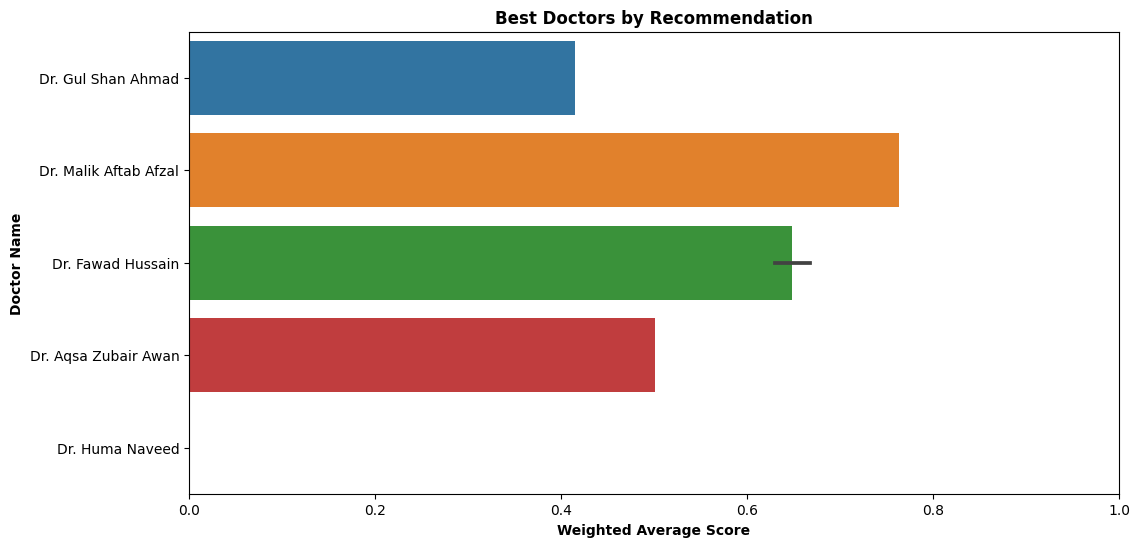

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

weight_average=df1_advanced
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['Recommendation Score'].head(10), y=weight_average['Name'].head(20), data=weight_average)
plt.xlim(0,1)
plt.title('Best Doctors by Recommendation', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Doctor Name', weight='bold')

**Content Based**

Performing content-based recommendations on the Medical Intervention column when we want to recommend similar interventions based on their descriptions. 

In [72]:
df2['Medical Intervention'] = df2['Medical Intervention'].fillna('')
df2=df2.dropna(axis=0)


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

In [75]:
tfv = TfidfVectorizer(min_df=3, max_features=None, 
                      strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
                      ngram_range=(1, 3), stop_words='english')

In [100]:
tfv_matrix = tfv.fit_transform(df2['Medical Intervention'])
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)



indices = pd.Series(df2.index, index=df2['Medical Intervention']).drop_duplicates()

In [101]:
indices

Medical Intervention
Angiography                                                     2
Angioplasty                                                     3
Hydrafacial For Deep Cleansing, Exfoliation, And Hydration     77
Cheek Augmentation                                             78
Jawline Contouring                                             79
                                                             ... 
Laparotomy For Ovarian Cancer                                 349
Manchester Repair                                             350
Vaginal Surgery For Prolapse                                  351
Suction Curettage                                             352
Excision Of Vulvar Lesions                                    353
Length: 181, dtype: int64

In [105]:

# Function to recommend similar medical interventions
def give_rec(intervention, sig=sig):
    # Ensure the intervention is in the index
    if intervention not in indices.index:
        return "Intervention not found."

    # Get the index corresponding to the medical intervention
    idx = indices[intervention]

    # Get the pairwise similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Ensure the scores are scalar and sortable
    sig_scores = [(i, score) for i, score in sig_scores]

    # Sort the interventions
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar interventions
    sig_scores = sig_scores[1:11]

    # Intervention indices
    intervention_indices = [i[0] for i in sig_scores]


    # Top 10 most similar interventions
    return df2['Medical Intervention'].iloc[intervention_indices].tolist()

# Testing the content-based recommendation system
print(give_rec('Angiography'))

['Hydrafacial For Deep Cleansing, Exfoliation, And Hydration', 'Carbon Facial For Deep Cleansing And Blackhead Removal', 'Chemical Peels For Skin Exfoliation And Acne Treatment', 'Angiography', 'Angioplasty', 'Cheek Augmentation', 'Jawline Contouring', 'Non-surgical Nose Job', 'Hand Rejuvenation', 'Chemical Eyebrow Lift']


In [ ]:
#Outputs other possible similar  medical interventions

USING KNN FOR COLLABARATIVE BASED.

In [106]:
df2.head()

,Medical Intervention,SURGERY TYPE,Name,AVAILABLE DOCTORS,QUALIFICATIONS,RATINGS,SATISFACTION,Normalized RATINGS,Normalized SATISFACTION,Recommendation Score
2,Angiography,Cardiologist,Dr. Gul Shan Ahmad,1,"MBBS, FCPS, Fellow Ship in interventional Card...",48.0,0.0100,0.073620,1.00,0.53681
3,Angioplasty,Cardiologist,Dr. Gul Shan Ahmad,1,"MBBS, FCPS, Fellow Ship in interventional Card...",48.0,0.0100,0.073620,1.00,0.53681
77,"Hydrafacial For Deep Cleansing, Exfoliation, A...",Dermatologist,Dr. Malik Aftab Afzal,3,"MD , Diploma (Dermatology), Master of Science ...",652.0,0.0097,1.000000,0.97,0.98500
78,Cheek Augmentation,Dermatologist,Dr. Fawad Hussain,3,"MBBS, Diplomate in Dermatology and Dermatosurg...",524.0,0.0099,0.803681,0.99,0.89684
79,Jawline Contouring,Dermatologist,Dr. Fawad Hussain,1,"MBBS, Diplomate in Dermatology and Dermatosurg...",524.0,0.0099,0.803681,0.99,0.89684


In [107]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors

In [118]:
# Encoding SURGERY TYPE
le_surgery = LabelEncoder()
df2['SURGERY TYPE Encoded'] = le_surgery.fit_transform(df2['SURGERY TYPE'])

# Encoding QUALIFICATIONS (for simplicity, we will use a basic encoding technique)
# Note: In practice, you might want to use more sophisticated techniques such as TF-IDF
df2['QUALIFICATIONS Encoded'] = df2['QUALIFICATIONS'].astype('category').cat.codes

# Creating feature matrix
features = df2[['SURGERY TYPE Encoded', 'QUALIFICATIONS Encoded']]

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

/tmp/ipykernel_33/3483845949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SURGERY TYPE Encoded'] = le_surgery.fit_transform(df2['SURGERY TYPE'])
/tmp/ipykernel_33/3483845949.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['QUALIFICATIONS Encoded'] = df2['QUALIFICATIONS'].astype('category').cat.codes


In [119]:
# Fit KNN model
knn = NearestNeighbors(n_neighbors=10, algorithm='auto')
knn.fit(features_scaled)

# Create a function to recommend based on the input intervention
def give_rec_based_on_features(intervention_name):
    if intervention_name not in df2['Medical Intervention'].values:
        return "Intervention not found."
    
    # Get the index of the intervention
    idx = df2[df2['Medical Intervention'] == intervention_name].index[0]
    
    # Get the features for this intervention
    intervention_features = features_scaled[idx].reshape(1, -1)
    
    # Find nearest neighbors
    distances, indices = knn.kneighbors(intervention_features)
    
    # Exclude the given intervention itself from recommendations
    similar_indices = indices[0][1:]
    similar_interventions = df2['Medical Intervention'].iloc[similar_indices].tolist()
    
    return similar_interventions


In [120]:
# Test the recommendation system
recommended_interventions = give_rec_based_on_features('Angiography')
print(recommended_interventions)


['Microneedling For Skin Rejuvenation And Acne Scars', 'Hydrafacial For Deep Cleansing, Exfoliation, And Hydration', 'LED Light Therapy', 'Mesotherapy For Skin Rejuvenation And Hair Loss', 'Dermal Fillers', 'Botox Injections For Wrinkles And Fine Lines', 'Dermal Fillers', 'Esophageal Stent Placement', 'Esophageal Stent Placement']
